<a href="https://colab.research.google.com/github/krishnaprasadlenka075/ECommerce_Dynamic/blob/main/Retail_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/manjeetsingh/retaildataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: krishnalenka
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/manjeetsingh/retaildataset


100%|██████████| 3.11M/3.11M [00:00<00:00, 620MB/s]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [ ]:

def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])

    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
nRowsRead = 1000

df1 = pd.read_csv('/content/retaildataset/Features data set.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Features data set.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 12 columns


In [ ]:
df1.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:

def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName

    df_numerical = df.select_dtypes(include=[np.number])
    df_numerical = df_numerical.dropna(axis='columns')
    df_numerical = df_numerical[[col for col in df_numerical if df_numerical[col].nunique() > 1]]
    if df_numerical.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant numerical columns ({df_numerical.shape[1]}) is less than 2')
        return
    corr = df_numerical.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

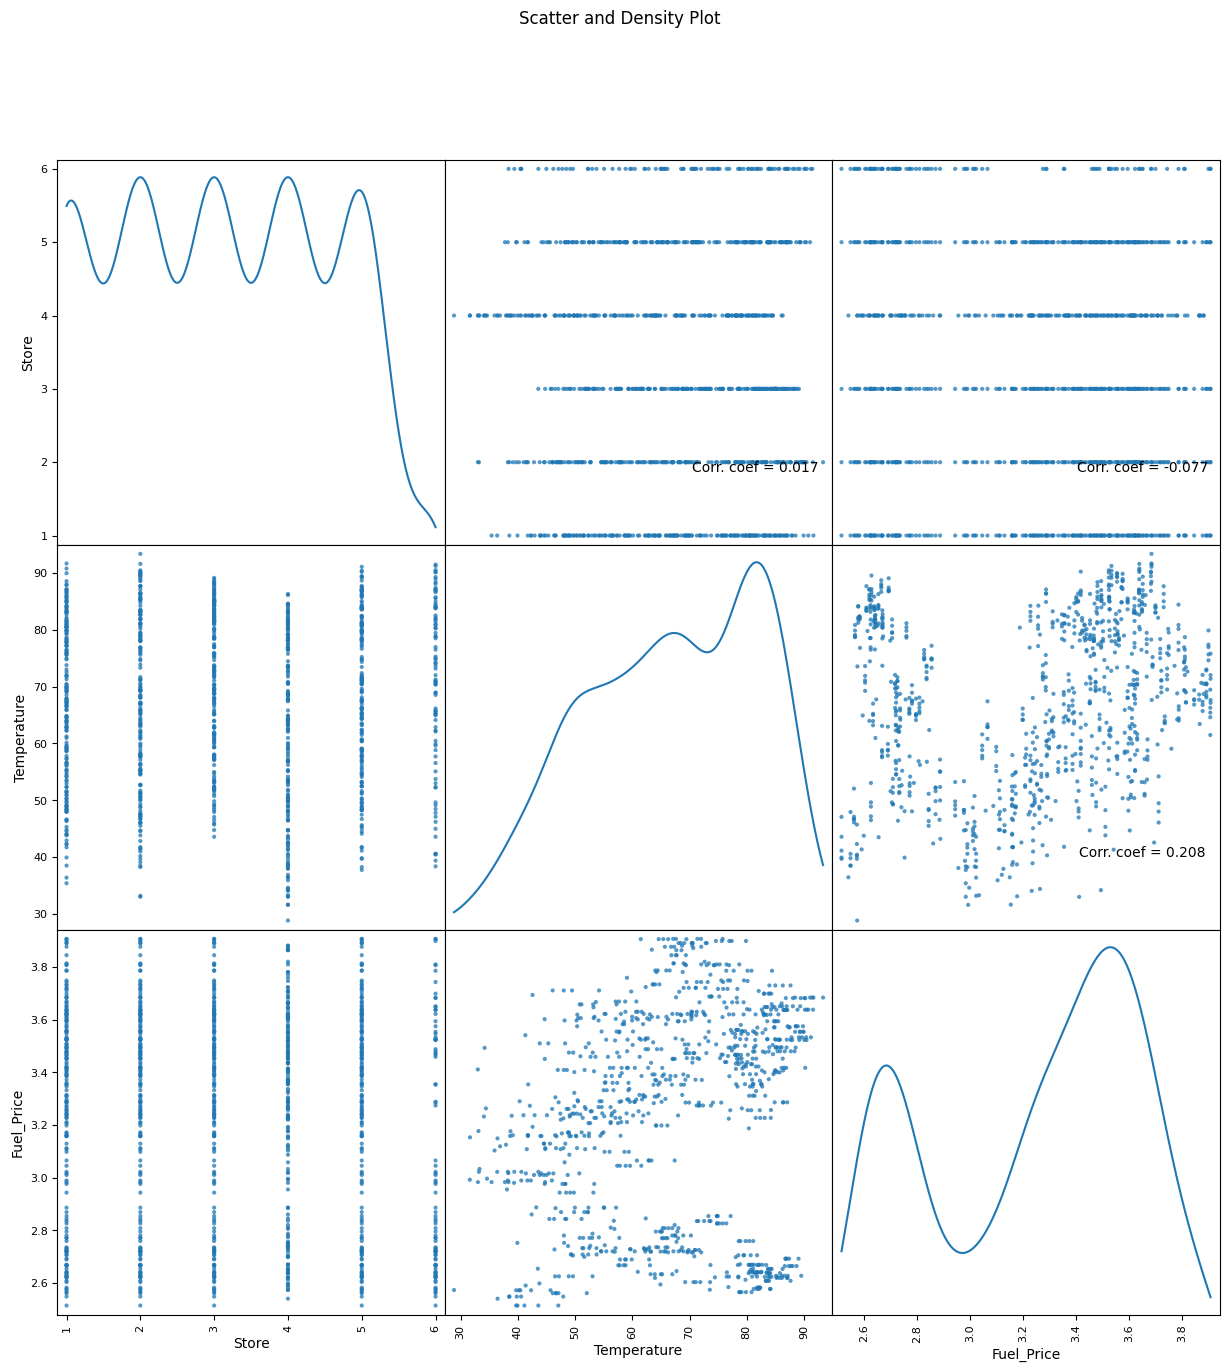

In [ ]:
plotScatterMatrix(df1, 15, 10)

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# sales data-set.csv has 421570 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/content/retaildataset/sales data-set.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'sales data-set.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 5 columns


In [ ]:
df2.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
plotPerColumnDistribution(df2, 10, 5)

ValueError: Number of rows must be a positive integer, not 1.2

<Figure size 2400x768 with 0 Axes>

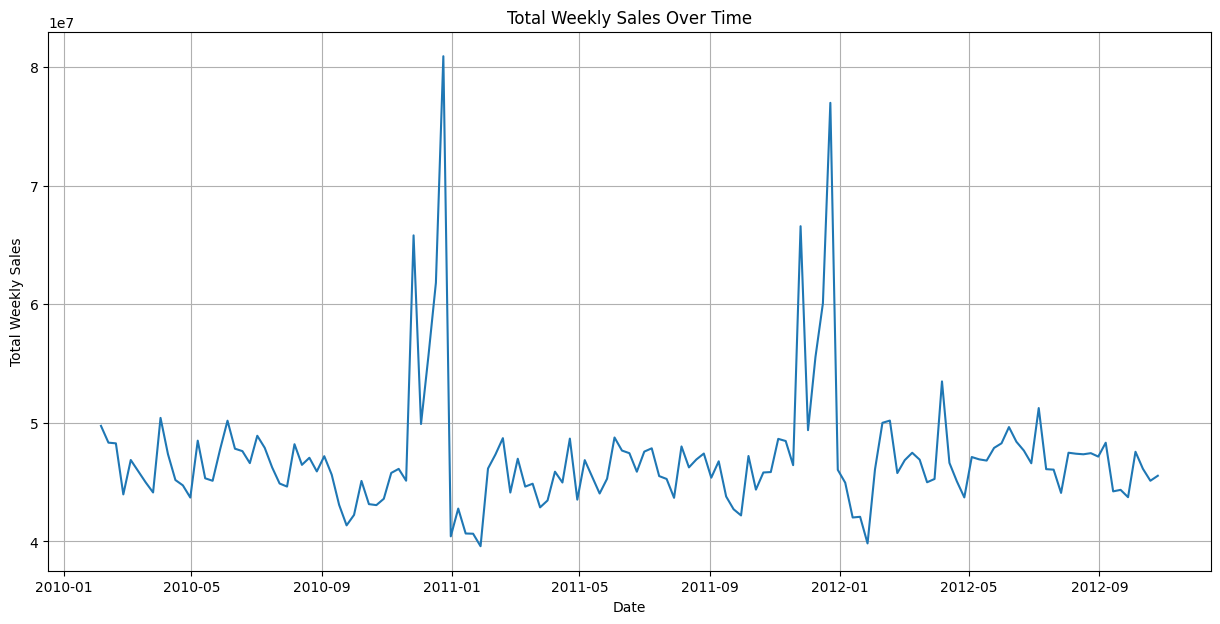

In [ ]:
# Aggregate weekly sales by date
weekly_sales_by_date = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot weekly sales over time
plt.figure(figsize=(15, 7))
plt.plot(weekly_sales_by_date['Date'], weekly_sales_by_date['Weekly_Sales'])
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

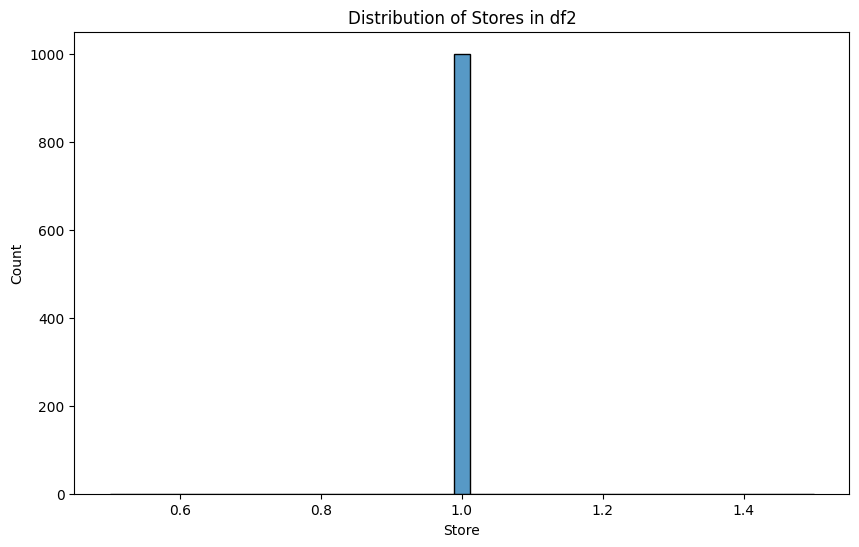

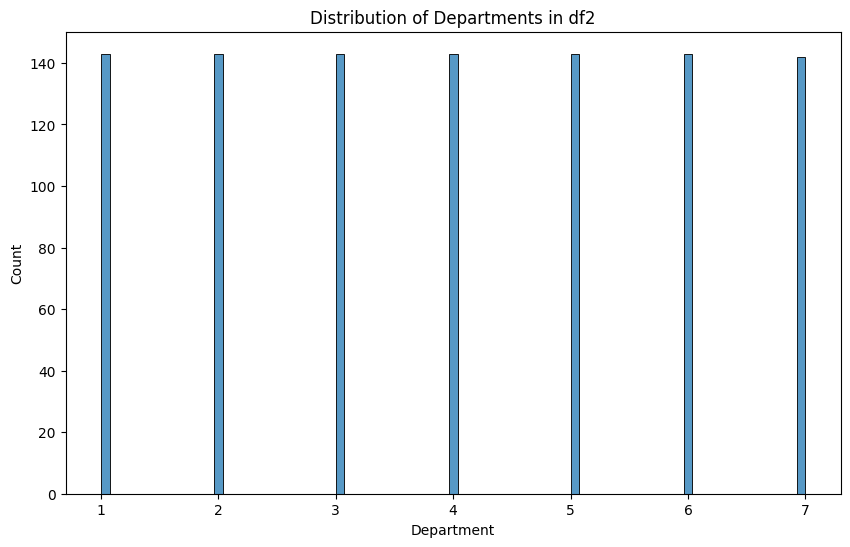

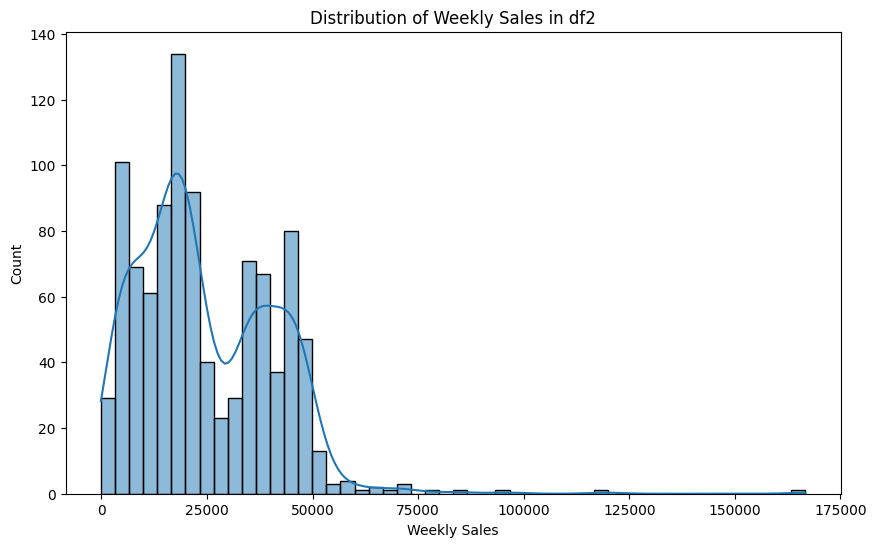

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of 'Store'
plt.figure(figsize=(10, 6))
sns.histplot(df2['Store'], kde=False, bins=45) # Assuming there are 45 stores based on the dataset description
plt.title('Distribution of Stores in df2')
plt.xlabel('Store')
plt.ylabel('Count')
plt.show()

# Plot distribution of 'Dept'
plt.figure(figsize=(10, 6))
sns.histplot(df2['Dept'], kde=False, bins=81) # Assuming there are 81 departments based on the dataset description
plt.title('Distribution of Departments in df2')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

# Plot distribution of 'Weekly_Sales'
plt.figure(figsize=(10, 6))
sns.histplot(df2['Weekly_Sales'], kde=True, bins=50)
plt.title('Distribution of Weekly Sales in df2')
plt.xlabel('Weekly Sales')
plt.ylabel('Count')
plt.show()

In [ ]:
plotCorrelationMatrix(df2, 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 640x640 with 0 Axes>

In [ ]:
# Analyze weekly sales by store
store_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()
store_sales_sorted = store_sales.sort_values('Weekly_Sales', ascending=False)
display(store_sales_sorted)

,Store,Weekly_Sales
19,20,3.014014e+08
3,4,2.995453e+08
13,14,2.890019e+08
12,13,2.865180e+08
1,2,2.753872e+08
9,10,2.716241e+08
26,27,2.538572e+08
5,6,2.237586e+08
0,1,2.224068e+08
38,39,2.074465e+08


In [ ]:
# Analyze the impact of holidays
holiday_sales_comparison = data.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()
display(holiday_sales_comparison)

,IsHoliday,Weekly_Sales
0,False,15952.816352
1,True,17094.300918


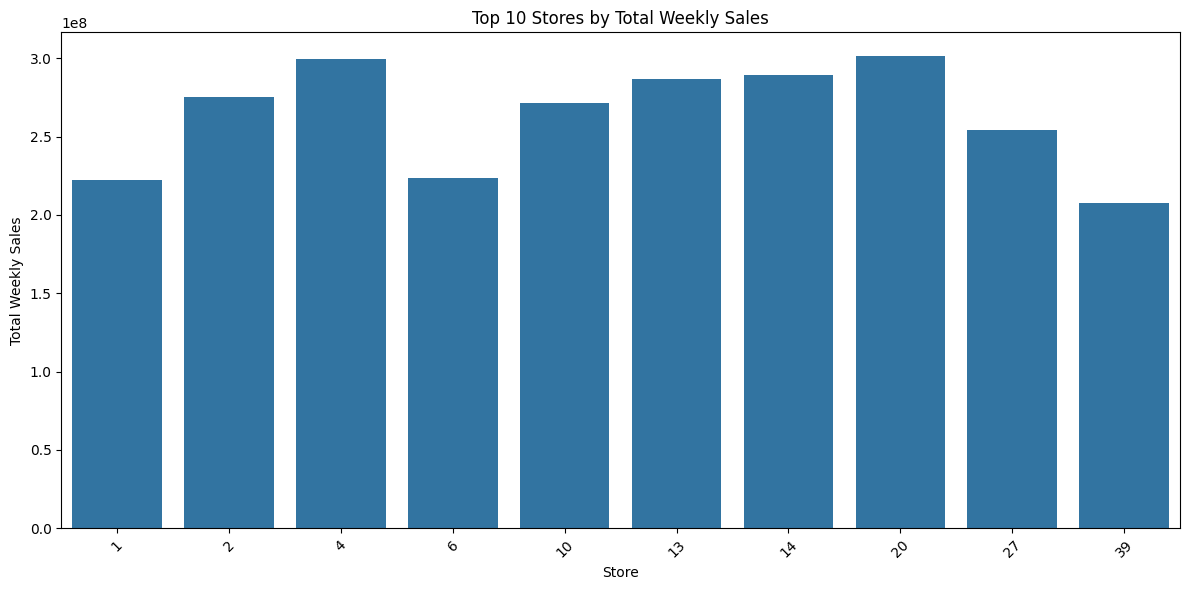

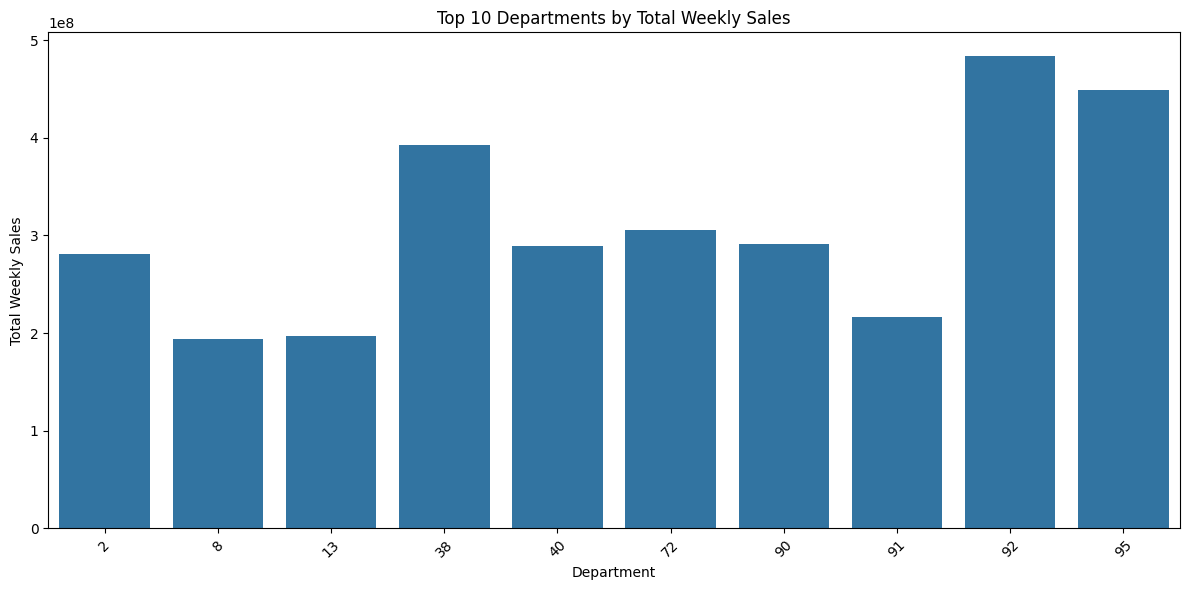

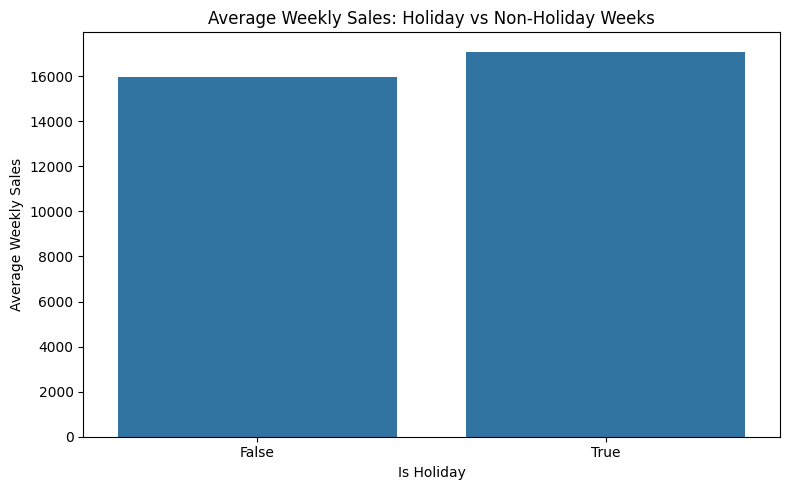

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 stores by total weekly sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales_sorted.head(10))
plt.title('Top 10 Stores by Total Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot top 10 departments by total weekly sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Dept', y='Weekly_Sales', data=department_sales_sorted.head(10))
plt.title('Top 10 Departments by Total Weekly Sales')
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot average weekly sales comparison for holidays
plt.figure(figsize=(8, 5))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=holiday_sales_comparison)
plt.title('Average Weekly Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['False', 'True'])
plt.tight_layout()
plt.show()

In [ ]:
# Analyze weekly sales by department
department_sales = data.groupby('Dept')['Weekly_Sales'].sum().reset_index()
department_sales_sorted = department_sales.sort_values('Weekly_Sales', ascending=False)
display(department_sales_sorted)

,Dept,Weekly_Sales
73,92,4.839433e+08
76,95,4.493202e+08
36,38,3.931181e+08
60,72,3.057282e+08
71,90,2.910685e+08
...,...,...
43,45,4.549691e+04
49,51,3.101135e+04
63,78,2.066910e+03
37,39,1.779800e+02


In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df3 = pd.read_csv('/content/retaildataset/stores data-set.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'stores data-set.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 45 rows and 3 columns


In [ ]:
df3.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


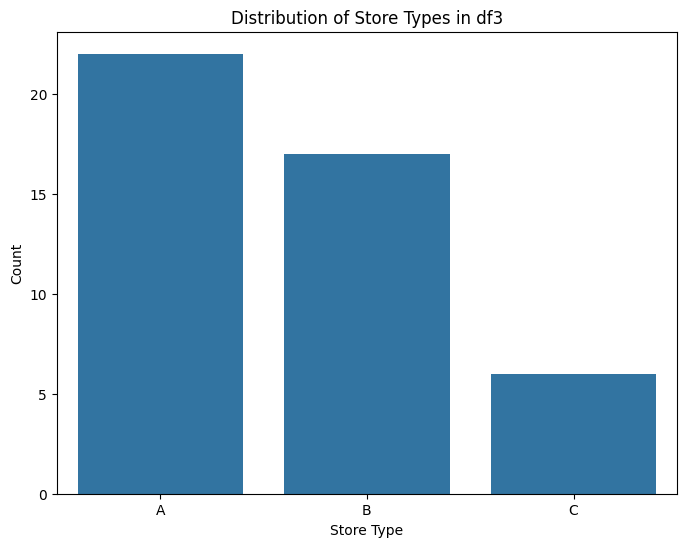

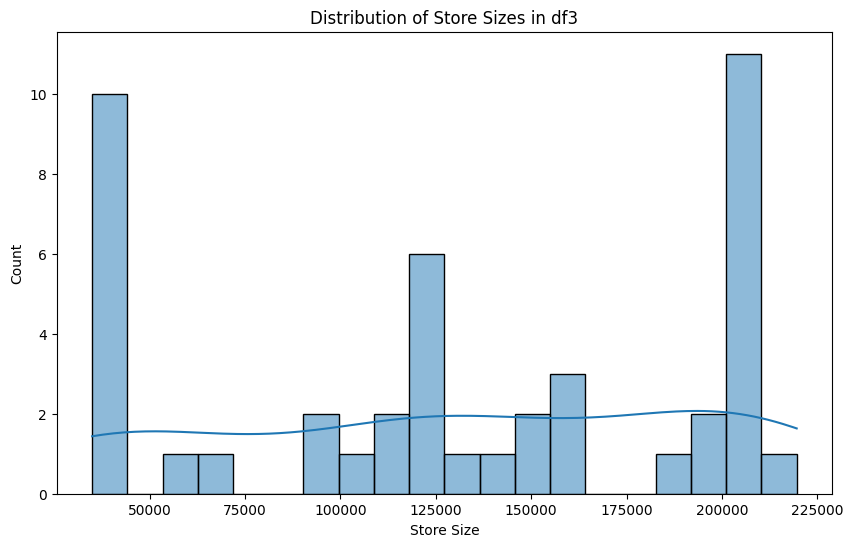

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of 'Type'
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df3)
plt.title('Distribution of Store Types in df3')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

# Plot distribution of 'Size'
plt.figure(figsize=(10, 6))
sns.histplot(df3['Size'], kde=True, bins=20)
plt.title('Distribution of Store Sizes in df3')
plt.xlabel('Store Size')
plt.ylabel('Count')
plt.show()